# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
old_data = data

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

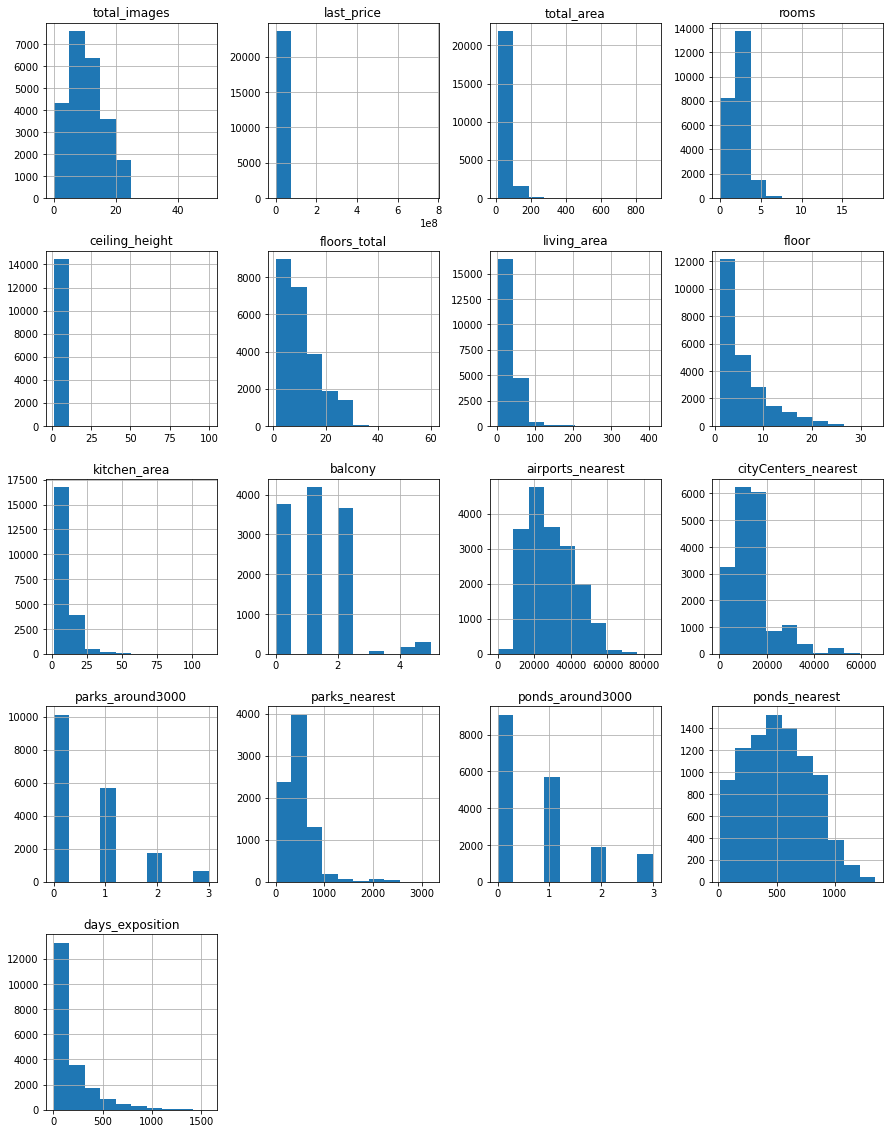

In [6]:
data.hist(figsize=(15, 20))

### Предобработка данных

# Работа с пропусками

In [7]:
data.isna().sum() #выявляю кол-во пустых значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)#Предпологая, что пропущенные значения в столбце являются умышленными и означают отрицание, задаю им значение False 

In [9]:
data['is_apartment'].unique()# Проверяю уникальные значения в столбце, убеждаюсь, что нет пропусков.

array([False,  True])

In [10]:
data['balcony'] = data['balcony'].fillna(0)# отсутствие значения в столбце скорее всего говорят , что в квартире нет балконов, их кол-во равно нулю.

In [11]:
data['balcony'].unique()# Проверяю уникальные значения в столбце, убеждаюсь в том, что нет пропусков.

array([0., 2., 1., 5., 4., 3.])

<div class="alert alert-block alert-info">
    
Заполняю пропуски в `living_area` и `kitchen_area`
    
</div>

In [12]:
total_living_ratio = data['living_area'].median()/data['total_area'].median() 
#соотношение медианной жилой площади к медианной общей площади

In [13]:
data['living_area'] = data['living_area'].fillna(data['total_area']*total_living_ratio)

In [14]:
data['living_area'].isna().sum() # проверка 

0

In [15]:
total_kitchen_ratio = data['kitchen_area'].median()/data['total_area'].median() 
#соотношение медианной площади кухни к медианной общей площади

In [16]:
data['kitchen_area'] = data['living_area'].fillna(data['total_area']*total_kitchen_ratio)

In [17]:
data['kitchen_area'].isna().sum() # проверка 

0

**Пропуски в столбцах `is_apartment` и `balcony`являются скорее всего умышленными, пользователи не стали заполнять предлженную форму в виду отсутствия балкона и/или квартира не являлась апартаментами. В столбцах living_area и kitchen_area пропуски заполнены благодаря нахождению соотношения медианной общей площеди с медианным значением соответствующего столбца**

**Остальные пропущенные значения оставляю неизменными по причинам невозможности нахождения правдоподобных данных, либо медианные данные не отражают действительности и не имеют значения, например: столбцы `ceiling_height` и `days_exposition`.**


# Изменеие типа данных

**При передаче значения `false` для пропусков в столбце `is_apartment` сам столбец меняет тип на `bool` 
Для проверки снова вызываем метод `info`** **Данный столбец имеет логический тип данных, кроме `True` и `False` не может иметь других значений.**

In [18]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Для дальнейшей работы с датой и временем необходимо перевести столбец `first_day_exposition` в тип `datetime64`**

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')


Проверяем:

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Можно еще сэкономить память, изменяя типы данных. Например, дополнительно изменить их у площадей квартир с float64 на float32. 

</div>


# Устранение неявных дубликатов

Выводим уникальные названия населенных пунктов:

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Вручную. через поиск по словам, выявляем неявные дубликаты. Так как список немаленький, выводим кол-во уникальных названий
для будующей проверки.

In [22]:
len(data['locality_name'].unique())

365

Переименовываем дубликаты

In [23]:
data['locality_name'] = data['locality_name'].replace('поселок Мурино','Мурино')
data['locality_name'] = data['locality_name'].replace('посёлок Мурино','Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово','Кудрово')
data['locality_name'] = data['locality_name'].replace('посёлок Тельмана','поселок Тельмана')
data['locality_name'] = data['locality_name'].replace('посёлок Аннино','поселок Аннино')
data['locality_name'] = data['locality_name'].replace('посёлок Гаврилово','поселок Гаврилово')
data['locality_name'] = data['locality_name'].replace('посёлок Победа','поселок Победа')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово','поселок Рябово')
data['locality_name'] = data['locality_name'].replace('посёлок Пансионат Зелёный Бор','поселок пансионат Зелёный Бор')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Красный Бор','поселок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Лебяжье','поселок городского типа Лебяжье')


Проверяем кол-во уникальных значений, если их меньше, то дубликаты исчезли!

In [24]:
len(data['locality_name'].unique())

355

# Устранение аномалий

Выводим уникальные значения высоты потолков

In [25]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В списке присутствуют слишком высокие значения. Скорее всего - это ошибка записи данных. Разделим анамально большие числа на 10, чтобы привести к нормальному виду десятичной дроби. Предположим что потолок высотой 10м в СПБ гдето могут существовать. 

In [26]:
data.loc[(data.ceiling_height > 10), 'ceiling_height'] = data['ceiling_height'][data['ceiling_height'] > 10]/10


Проверим как перезаписались значения:

In [27]:
 data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

В списке остались только странные маленькие значения, например: потолок высотой 1 метр. Отбросим их! Предположим, что минимальная высота потолка будет составлять 2 метра.

In [28]:
data['ceiling_height'] = data['ceiling_height'][data['ceiling_height'] >2]

Проверим минимальные и максимальные значения столбца методом `describe()`

In [29]:
data['ceiling_height'].describe()


count    14487.000000
mean         2.729204
std          0.298033
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

Вообще методом `describe()` можно пройтись по всем столбцам с количественными значениями для выявления выбросов. Например:

In [30]:
data['last_price'].describe()


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Игнорируем еденичные высочайшие значения цены объекта:

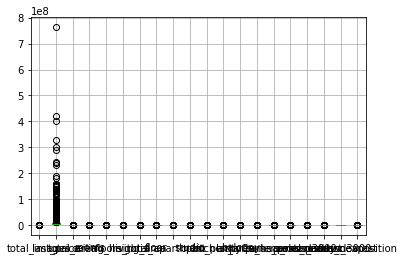

In [31]:
data.boxplot(), 
data['last_price'] = data['last_price'].loc[data['last_price'] < 200000000]


In [32]:
data['last_price'].describe()

count    2.369000e+04
mean     6.408173e+06
std      7.897411e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.790000e+06
max      1.908700e+08
Name: last_price, dtype: float64

In [33]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Здесь все чисто!

In [34]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [35]:
data['rooms'].describe()


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Удаляем "нулекомнатные квартиры" 

In [36]:
data['rooms']= data['rooms'][data['rooms'] > 0]
data['rooms'].describe()



count    23502.000000
mean         2.087993
std          1.066050
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

### Посчитайте и добавьте в таблицу новые столбцы

In [37]:
data['price_square'] = data['last_price'] / data['total_area']
data['price_square']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_square, Length: 23699, dtype: float64

In [38]:
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday
def weekday(day):
    if day == 0:
        return 'понидельник'
    elif day == 1:
        return 'вторник'
    elif day == 2:
        return 'среда'
    elif day == 3:
        return 'четверг'
    elif day == 4:
        return 'пятница'
    elif day == 5:
        return 'суббота'
    elif day == 6:
        return 'воскресение'
data['week_day_exposition'] = data['week_day_exposition'].apply(weekday)    

Проверка заполнения столбца

In [39]:
data['week_day_exposition']

0            четверг
1            вторник
2            четверг
3            пятница
4            вторник
            ...     
23694        вторник
23695    понидельник
23696    воскресение
23697        вторник
23698        пятница
Name: week_day_exposition, Length: 23699, dtype: object

In [40]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data['month_exposition']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_exposition, Length: 23699, dtype: int64

In [41]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_exposition, Length: 23699, dtype: int64

In [42]:

def types(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['type_floor']= data.apply(types, axis=1)
data['type_floor'].unique()#проверочка)

array(['другой', 'первый', 'последний'], dtype=object)

In [43]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23699, dtype: float64

### Проведите исследовательский анализ данных

**общая площадь**


In [44]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

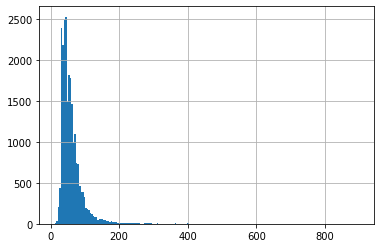

In [45]:
data['total_area'].hist(bins=200, grid=True)

Большая часть объектов имеет площадь ~ 30 - 50 м². Пик в районе 50 м².  Что соответствует медианному значению. 
Ожидаемое распределение.

**жилая площадь**

In [46]:
data['living_area'].describe()

count    23699.000000
mean        34.624296
std         22.381873
min          2.000000
25%         19.000000
50%         30.000000
75%         42.173077
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

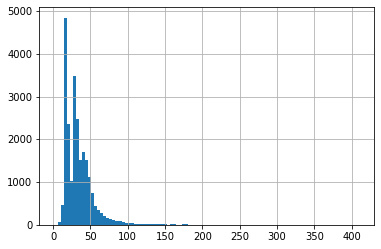

In [47]:
data['living_area'].hist(bins=100, grid=True)

Больше всего объектов с жилой площадью ~ 20м² данный показатель входит в межквартильный размах, сомниваться в данных не приходится.

**площадь кухни**

In [48]:
data['kitchen_area'].describe()

count    23699.000000
mean        34.624296
std         22.381873
min          2.000000
25%         19.000000
50%         30.000000
75%         42.173077
max        409.700000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

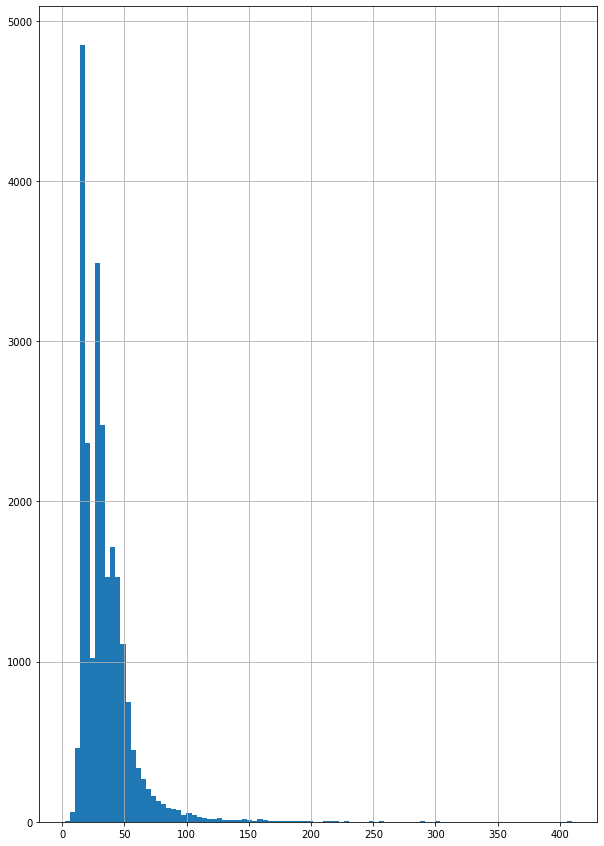

In [49]:
data['kitchen_area'].hist(bins=100, grid=True, figsize=(10, 15))

Объектов с кухней в ~ 9м² больше, скорее всего это следствие типовой застройки, типичная "сталинка". Ну а кухни в 50м² это действительно редкость. Распределение ожидаемое - нормальное, данные сопоставимы с реальностью. 

**цена объекта**

In [50]:
data['last_price'].describe()

count    2.369000e+04
mean     6.408173e+06
std      7.897411e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.790000e+06
max      1.908700e+08
Name: last_price, dtype: float64

Строим гистограмму, для наглядности перевожу значения в миллионы: 

<AxesSubplot:>

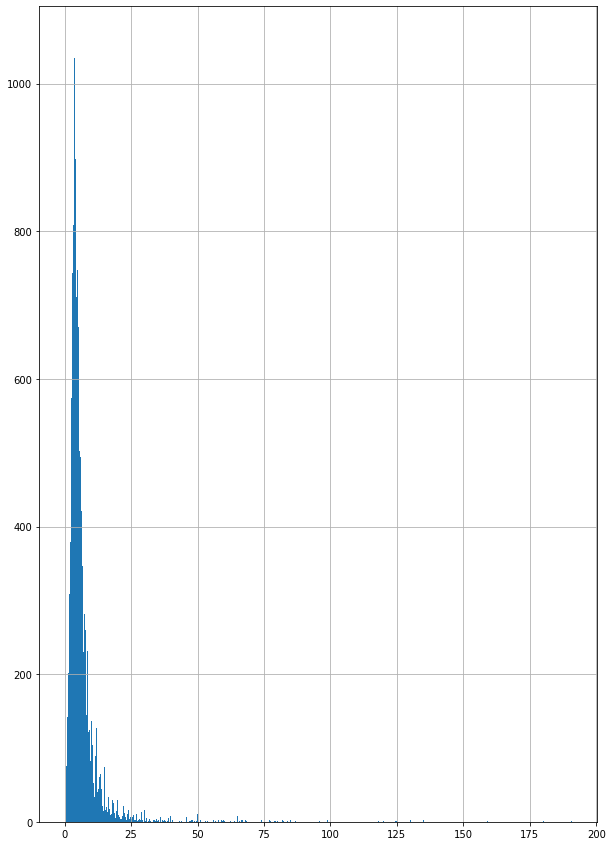

In [51]:
(data['last_price']/1000000).hist(bins=1000,figsize=(10, 15))

Чем дороже жилье, тем меньше предложений, меньше будет предложений по цене ниже рыночной. 

**количество комнат**

In [52]:
data['rooms'].describe()

count    23502.000000
mean         2.087993
std          1.066050
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

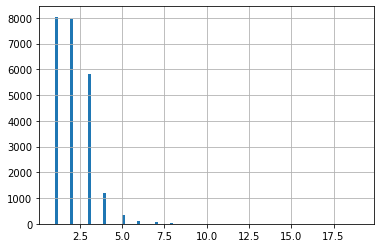

In [53]:
data['rooms'].hist(bins=100, grid=True)

"Однушки" и "двушки" в топе - логично! Распределение нормальное!

**высота потолков**

In [54]:
data['ceiling_height'].describe()

count    14487.000000
mean         2.729204
std          0.298033
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

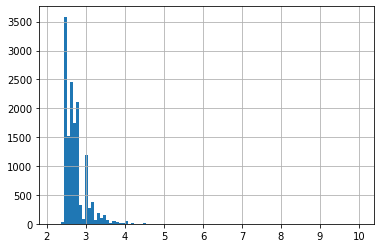

In [55]:
data['ceiling_height'].hist(bins=100, grid=True)

И опять же типичная застройка - потолки 2.5 метра в большенстве случаев.

**этаж квартиры**

In [56]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

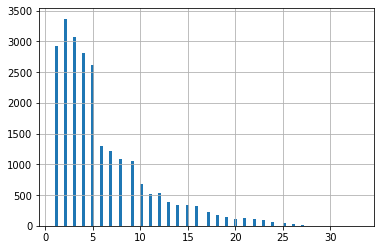

In [57]:
data['floor'].hist(bins=100, grid=True)

Пятиэтажки лидируют на рынке жилья! 
P.S. Вообще СПБ не самый высотный город. После строительства Зимнего дворца всем петербургским зодчим строго-настрого предписывалось - их творения не должны быть выше Зимнего дворца.

**тип этажа квартиры**

In [58]:
data['type_floor'].describe()

count      23699
unique         3
top       другой
freq       17446
Name: type_floor, dtype: object

<AxesSubplot:>

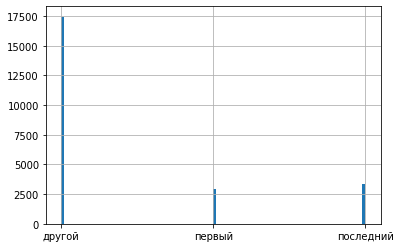

In [59]:
data['type_floor'].hist(bins=100, grid=True)

**общее количество этажей в доме**


In [60]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

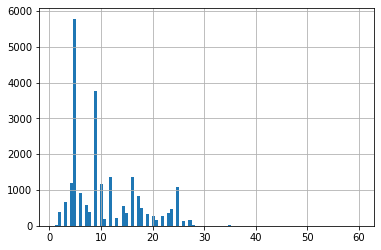

In [61]:
data['floors_total'].hist(bins=100, grid=True)

Пяти и девятиэтажные дома в топе предложений - наше советское наследие.

**расстояние до центра города в метрах**

In [62]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

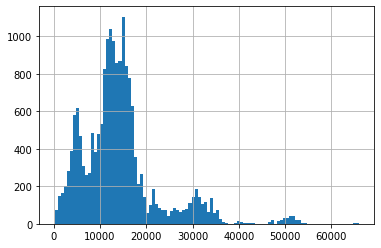

In [63]:
data['cityCenters_nearest'].hist(bins=100, grid=True)

Не самые плохие условия, от 10 до 17 км до центра большая часть предложений. Также есть 600 предложений в 5км от центра. Есть из чего выбрать!

**расстояние до ближайшего аэропорта**

In [64]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

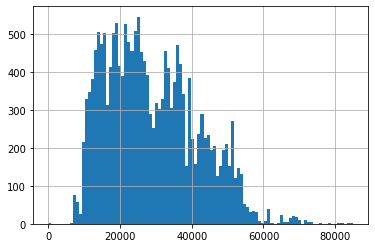

In [65]:
data['airports_nearest'].hist(bins=100, grid=True)

Кто то продает недвижимость в аэропорту! Или данные были плохо обработанны)
Не смотря на это, можно сделать вывод, что в непосредственной близасти с аэропортом почти никто не живет. Пики на графике - это скорее всего густонаселенные районы Санкт-Петербурга, а снижение обусловленно тем, что плотность начеления уменьшается, отдаляюсь от центра.

**расстояние до ближайшего парка**

In [66]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

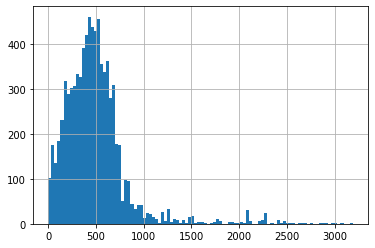

In [67]:
data['parks_nearest'].hist(bins=100, grid=True)

Вывод: очень много парков!

**день и месяц публикации объявления**

<AxesSubplot:>

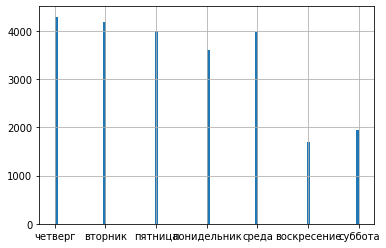

In [68]:
data['week_day_exposition'].hist(bins=100, grid=True) 



<AxesSubplot:>

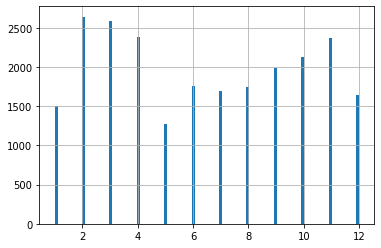

In [69]:
data['month_exposition'].hist(bins=100, grid=True)

Летом, в Мае, Декабре и Январе, в выходные дни объявлений выставлялось на порядок меньше чем в остольное время. Логика в этом есть! Кто будет продавать недвижимость в праздники или в отпуске? Такие люди тоже есть - это хорошо )


**Как быстро продавались квартиры**

<AxesSubplot:>

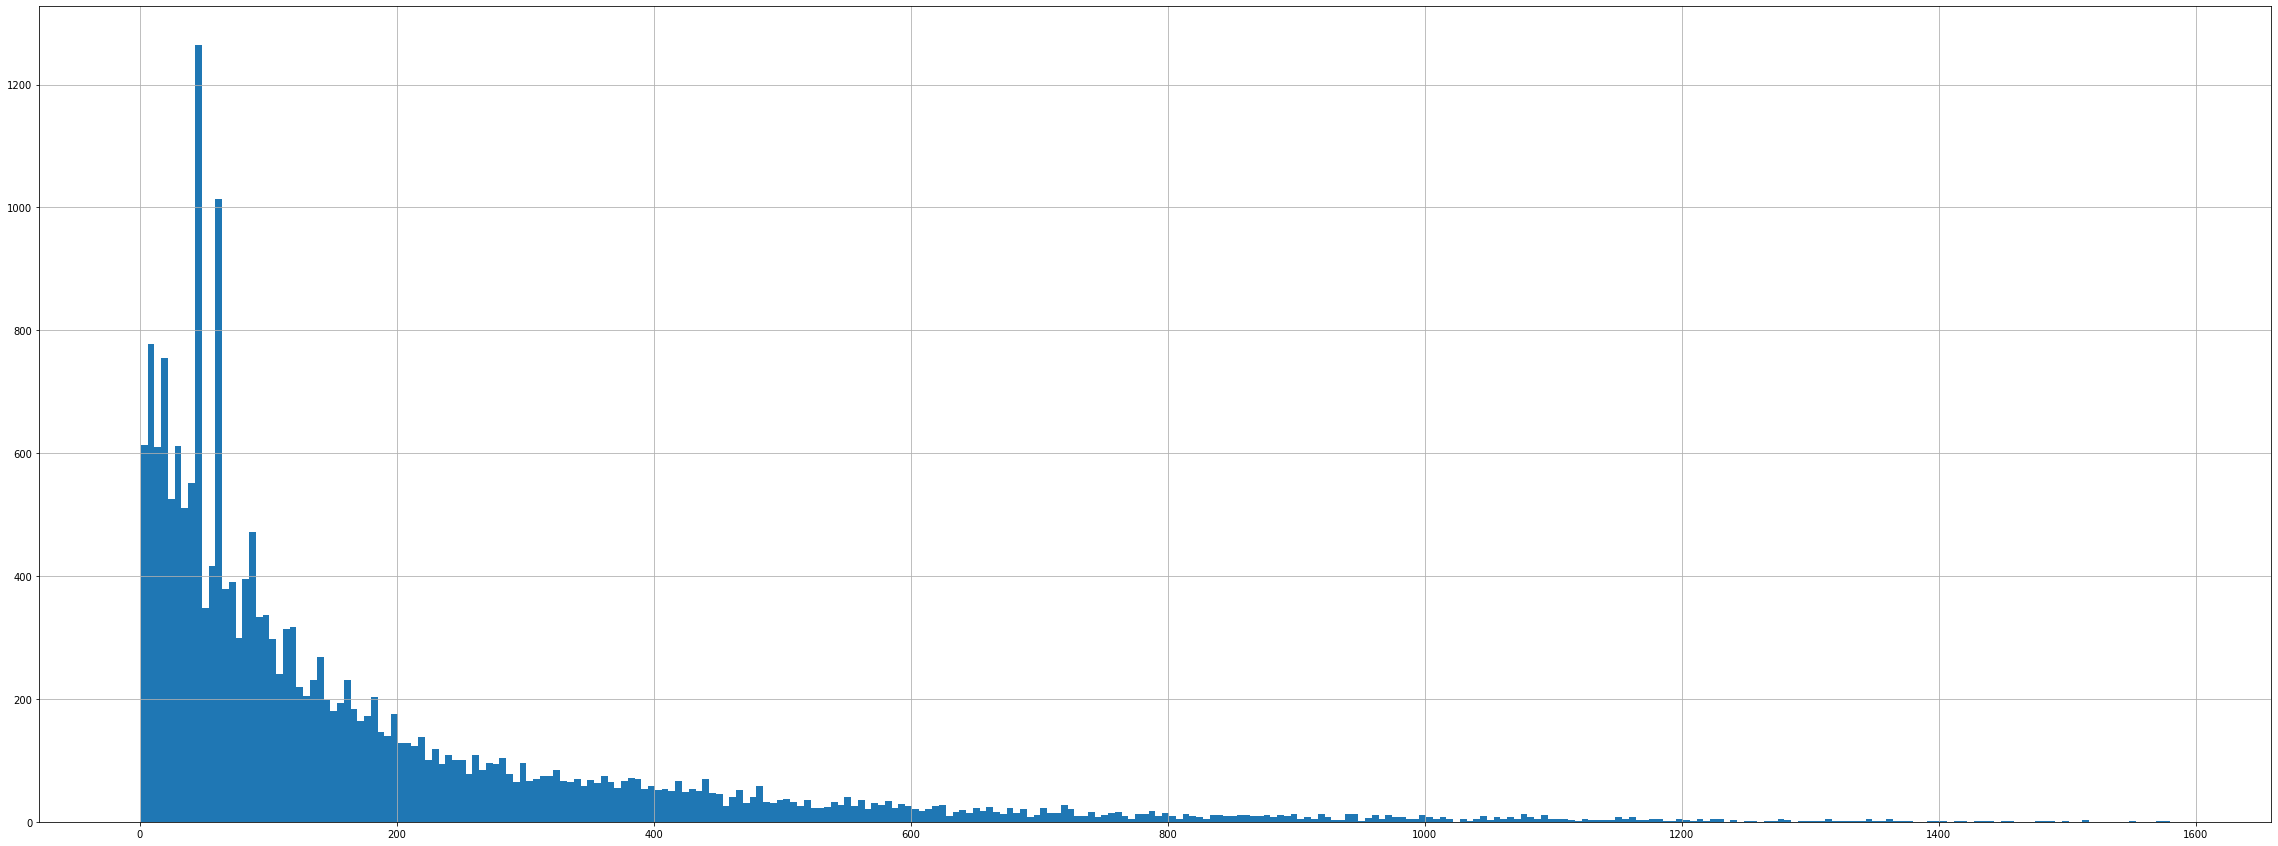

In [70]:
data['days_exposition'].hist(bins=300, figsize=(40, 15))

<div class="alert alert-block alert-info">
    
Меняю масштаб гистограммы для выявления выбрасов:
    
</div>

<AxesSubplot:>

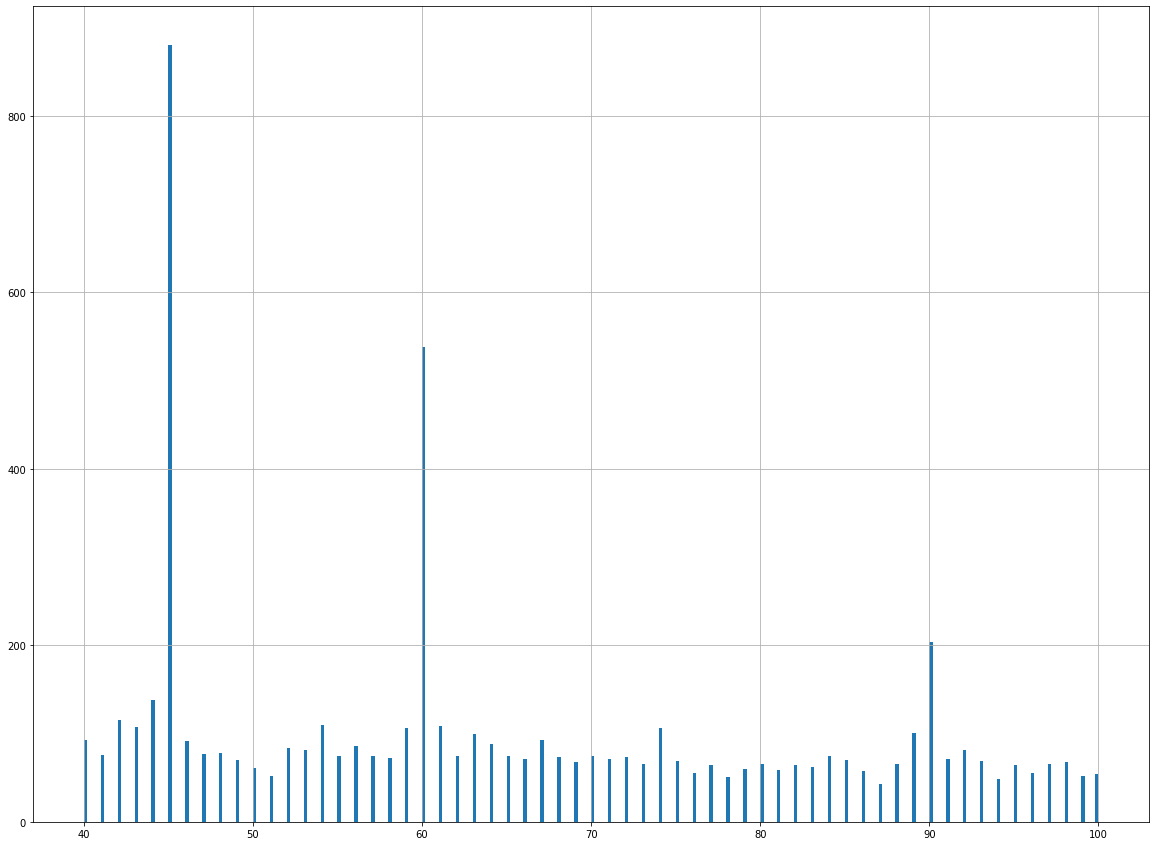

In [71]:
data['days_exposition'].hist(bins=300, figsize=(20, 15), range=(40, 100))

<div class="alert alert-block alert-info">
    
Из графика видны выбросы : 45, 60, 90 
Они обусловленны срокамии публикации:
Квартира	до 4,5 млн — 45 дней
            от 4,5 до 10 млн — 60 дней
            от 10 млн — 90 дней
    
</div> 

<div class="alert alert-block alert-info">
Удаляю данные выбросы 
</div>

In [72]:
data = data.loc[(data['days_exposition'] != 45) &\
                (data['days_exposition'] != 60) &\
                (data['days_exposition'] != 90)] 


<AxesSubplot:>

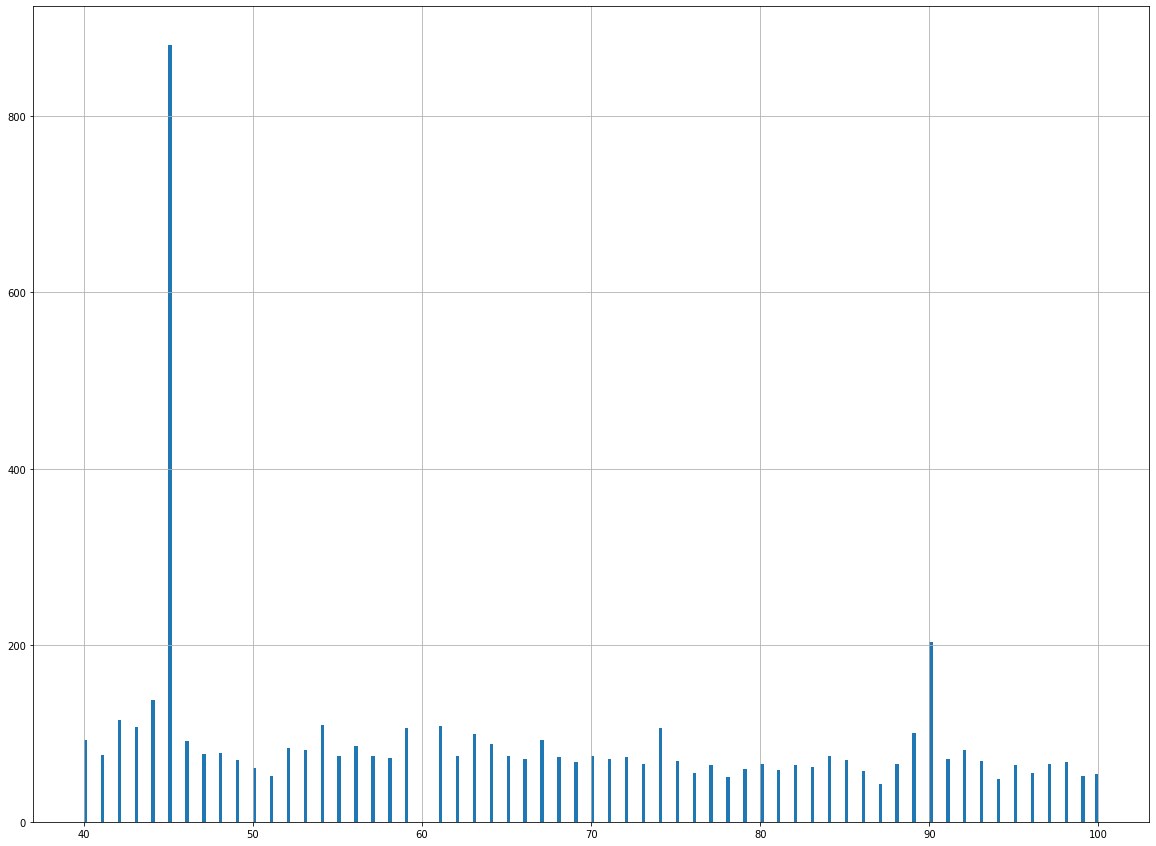

In [73]:
data['days_exposition'].hist(bins=300, figsize=(20, 15), range=(40, 100))

In [100]:
data.query('days_exposition == 45')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,week_day_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km


In [75]:
data['days_exposition'].mean()

184.1437937937938

In [76]:
data['days_exposition'].median()

100.0

In [77]:
data['days_exposition'].describe()

count    19980.000000
mean       184.143794
std        221.757454
min          1.000000
25%         44.000000
50%        100.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются за полгода.
 Предлагаю считать все продажи после 232 дней долгими, а до 45 дней - быстрыми, согласно показателям до первого и после третьего квартилей.

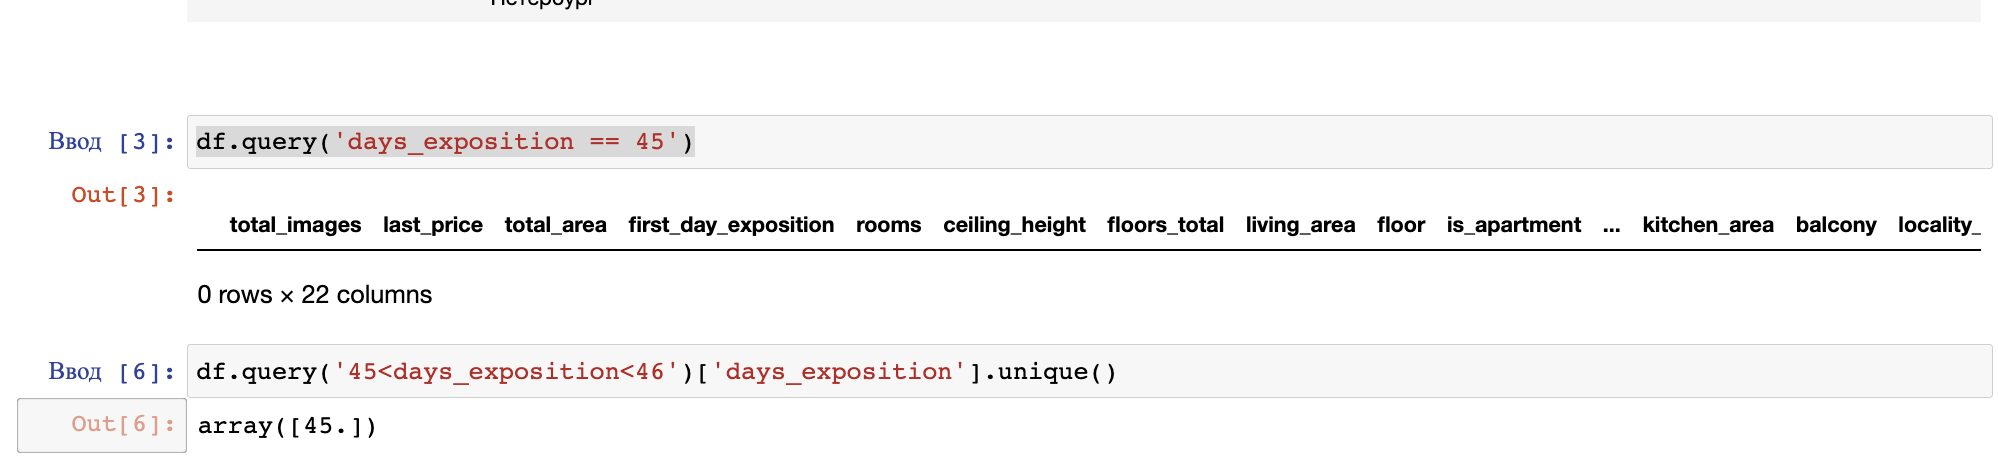

**Какие факторы больше всего влияют на общую стоимость объекта?**

Формируем сводную таблицу:

In [78]:
data_price_pivot = data.pivot_table(
    index='last_price',
    values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'first_day_exposition']
)

data_price_pivot

,kitchen_area,living_area,rooms,total_area
last_price,,,,
12190.0,32.000000,32.000000,2.000000,109.000000
430000.0,23.576923,23.576923,1.500000,42.200000
440000.0,23.076923,23.076923,1.000000,40.000000
450000.0,23.202885,23.202885,1.750000,40.100000
470000.0,27.115385,27.115385,1.333333,40.833333
...,...,...,...,...
159000000.0,180.000000,180.000000,4.000000,260.000000
159984000.0,131.000000,131.000000,4.000000,242.400000
160000000.0,145.000000,145.000000,5.000000,243.000000


***Общая площадь***

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

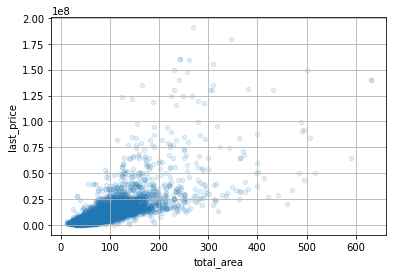

In [79]:
data.plot(
    x='total_area',
    y='last_price',
    kind='scatter',
    grid=True, 
    alpha=0.13
) 

Прямая зависимость просматривается сразу. Чем больше площадь тем дороже квартира. Это доказывает коэффициент корреляции! 

In [80]:
data['total_area'].corr(data['last_price'])

0.7408037594975213

***Жилая площадь***

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

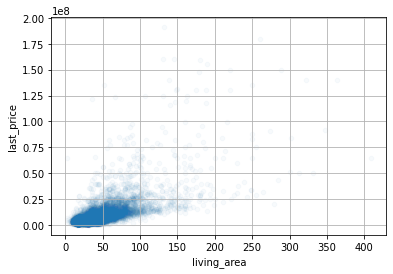

In [81]:
data.plot(
    x='living_area',
    y='last_price',
    kind='scatter',
    grid=True, 
    alpha=0.03
) 

Прямая зависимость тоже просматривается. С увиличением жилой площади возрастает цена. Но уже более плавный график, коэффицент корреляции должен быть ниже.

In [82]:
data['living_area'].corr(data['last_price'])

0.6739052380730526

***Площадь кухни***

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

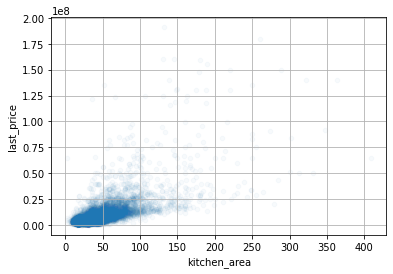

In [83]:
data.plot(
    x='kitchen_area',
    y='last_price',
    kind='scatter',
    grid=True, 
    alpha=0.03
) 

Площадь кухни меньше влияет на цену, чем жилая площадь.

In [84]:
data['kitchen_area'].corr(data['last_price'])

0.6739052380730526

***Кол-во комнат:***

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

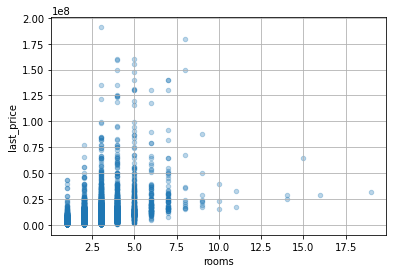

In [85]:
data.plot(
    x='rooms',
    y='last_price',
    kind='scatter',
    grid=True, 
    alpha=0.3
) 

Чем больше комнат, тем дороже. Однако не все так просто, видимо другие факторы вносят свои коррективы, кол-во комнат влияет на стоимость, но менее предыдущих факторов.

***Месяц размещения***

<AxesSubplot:xlabel='month_exposition', ylabel='last_price'>

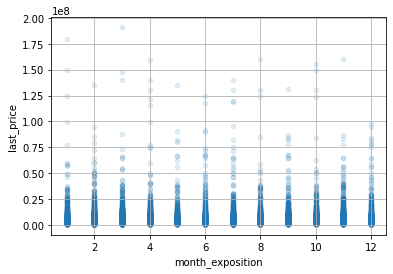

In [86]:
data.plot(y='last_price',
          x='month_exposition',
          kind='scatter',
          grid=True,
          alpha=0.13
         ) 

Линейная зависимость практически отсутствует - можно выкладывать объявление в любом месяце.

***День недели размещения***

<AxesSubplot:xlabel='week_day_exposition', ylabel='last_price'>

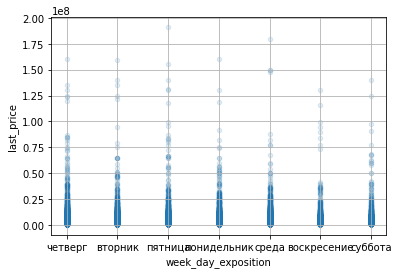

In [87]:
 data.plot(
     y='last_price',
     x='week_day_exposition',
     kind='scatter',
     grid=True,
     alpha=0.13
 ) 

Цена на недвижимость не зависит от дня недели первого показа объявления. 

***Типы этажей***

<AxesSubplot:xlabel='type_floor', ylabel='last_price'>

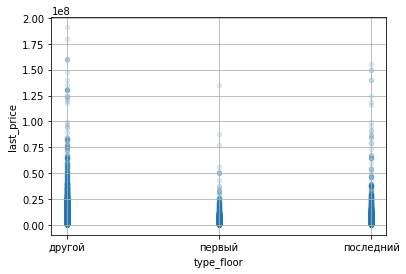

In [88]:
data.plot(
    y='last_price', 
    x='type_floor', 
    kind='scatter', 
    grid=True, 
    alpha=0.13
) 

Глядя на график, мы видим, что тип этажа влияет на цену. Чаще более дорогие объекты находятся не на первом и не на последнем этаже. Объекты на первых этажах самые дешевые. 

***Вывод:*** из проанализированных факторов больше всего влияет на стоимость жилья общая площадь и жилая площадь. Менее, но все же влияет на стоимость объекта: площадь кухни, кол-во комнат, этаж.

 --**Цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [89]:
price_locality  = data.pivot_table(index='locality_name', values='price_square', aggfunc=['count','mean'])
price_locality = price_locality.reindex(price_locality['count'].sort_values(by='price_square', ascending=False).index)
price_locality_top = price_locality.iloc[:10]
price_locality_top



,count,mean
,price_square,price_square
locality_name,,
Санкт-Петербург,15304,114502.157557
Мурино,580,86008.619196
Кудрово,452,95278.060504
посёлок Шушары,429,78605.427885
Всеволожск,391,68449.657026
Пушкин,362,103230.394424
Колпино,331,75489.623370
посёлок Парголово,315,90224.983046


In [90]:
price_locality_min_max = data.pivot_table(index='locality_name', values='price_square', aggfunc='mean')
price_locality_min_max = price_locality_min_max.sort_values(by='price_square', ascending=False)
price_locality_min_max.iloc[:1] , price_locality_min_max.iloc[-1:]


(                price_square
 locality_name               
 Зеленогорск    115122.799198,
                     price_square
 locality_name                   
 деревня Старополье  11206.221198)

Поселок Лисий Нос - Дорого! Старополье - Дешево!

**Вычислите среднюю цену каждого километра**

In [91]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
price_km = spb_data.pivot_table(index='cityCenters_nearest_km', values='price_square',aggfunc='mean')
price_km

,price_square
cityCenters_nearest_km,
0.0,252385.908450
1.0,162576.707177
2.0,155333.864076
3.0,121887.840306
4.0,130791.920559
5.0,140084.629465
6.0,150928.705133
7.0,156870.081497
8.0,125379.932022


<AxesSubplot:xlabel='cityCenters_nearest_km'>

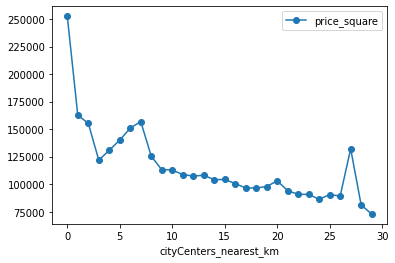

In [92]:
price_km.plot(style='-o')

Чем дальше от центра тем дешевле, однако есть и дорогие объекты вне центра. Проверим их!

In [93]:
spb_data.query('cityCenters_nearest_km == 7')['price_square'].max()

841379.3103448276

In [94]:
spb_data.query('price_square == 841379.3103448276' )

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,week_day_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
16647,15,122000000.0,145.0,2017-04-25,3.0,3.3,6.0,36.0,2,False,...,478.0,3.0,250.0,335.0,841379.310345,вторник,4,2017,другой,7.0


Трехкомнатная квартира в 7 км от центра Петербурга выбивается из графика своей ценой в 122 млн.
Скорее всего в месте размещения данного объекта есть какая то "изюминка"(место притяжения), это доказывает восхождение точек на графике к этому пиковому значению.

In [95]:
spb_data.query('cityCenters_nearest_km == 27')['price_square'].max()

193918.9189189189

In [96]:
spb_data.query('price_square == 193918.9189189189' )

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,week_day_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
748,13,14350000.0,74.0,2017-11-28,2.0,3.13,5.0,30.0,3,False,...,1496.0,0.0,NaN,128.0,193918.918919,вторник,11,2017,другой,27.0


Дорогая двушка в 27 км от центра выглядит как аномалия. Интересно было бы посмотреть фото)) 
Скорее всего данный объект недвижимости относится к элитным

### Общий вывод

Проанализировав данные по недвижимости, можно смело сказать что на цену влияют много факторов, все в разной степени. Для наглядности предоставляю список факторов влияющих на цену недвижимости. Список факторов по нисходящей, то есть чем больше степень влияния на стоимость тем выше фактор в списке:
* Удаленность от центра (чем ближе к центру, тем дороже)
    
* Общая площадь (Чем больше, тем дороже)
* Жилая площадь (Чем больше, тем дороже)
* Кол-во комнат (Чем больше, тем дороже)
* Площадь кухни (Чем больше, тем дороже)
* Этажность     (Дороже если это не последний и особенно не первый этаж)

Такие факторы как кол-во этажей, высота потолка, площадь кухни говорят о том, что большая часть предложений - это типовая, скорее всего, советская застройка.
Благодаря анализу выяснилось, что в среднем квартира продается в течении 6 месяцев. Если она продалась за полтора месяца, то это быстро!





**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод